In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from pylab import rcParams
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='svg'

In [3]:
from sklearn.tree import DecisionTreeClassifier

x_train = pd.read_pickle('x_train.plk')
y_train = pd.read_pickle('y_train.plk')

x_valid = pd.read_pickle('x_valid.plk')
y_valid = pd.read_pickle('y_valid.plk')

x_train = x_train.drop('PassengerId', axis=1)
# y_train = y_train.drop('PassengerId', axis=1)
x_valid = x_valid.drop('PassengerId', axis=1)
# y_valid = y_valid.drop('PassengerId', axis=1)

In [4]:
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [6]:
c_vals = np.arange(2,10)
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)

    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train,y_pred_train)

    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('max_depth={} \n\tacc_valid = {} \n\tacc_train = {}'.format(val, acc_valid, acc_train))

max_depth=2 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8023952095808383
max_depth=3 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8323353293413174
max_depth=4 
	acc_valid = 0.8071748878923767 
	acc_train = 0.842814371257485
max_depth=5 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8488023952095808
max_depth=6 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8577844311377245
max_depth=7 
	acc_valid = 0.8116591928251121 
	acc_train = 0.875748502994012
max_depth=8 
	acc_valid = 0.7623318385650224 
	acc_train = 0.8967065868263473
max_depth=9 
	acc_valid = 0.7713004484304933 
	acc_train = 0.9131736526946108


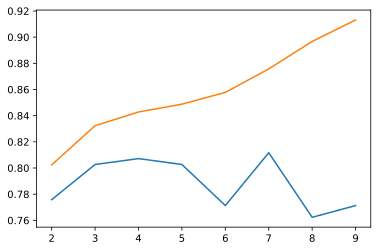

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='svg'
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[150,200,250],
               'max_features': np.arange(5,9),
               'max_depth': np.arange(5, 10)}]

In [15]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)

In [17]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([5, 6, 7, 8, 9]),
                          'max_features': array([5, 6, 7, 8]),
                          'n_estimators': [150, 200, 250]}],
             scoring='accuracy')

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([5, 6, 7, 8, 9]),
                          'max_features': array([5, 6, 7, 8]),
                          'n_estimators': [150, 200, 250]}],
             scoring='accuracy')

In [19]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [22]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means,stds,clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f for %r" % (mean, std*2, params))

0.822 (+/-0.070 for {'max_depth': 5, 'max_features': 5, 'n_estimators': 150}
0.825 (+/-0.069 for {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
0.822 (+/-0.067 for {'max_depth': 5, 'max_features': 5, 'n_estimators': 250}
0.819 (+/-0.079 for {'max_depth': 5, 'max_features': 6, 'n_estimators': 150}
0.819 (+/-0.079 for {'max_depth': 5, 'max_features': 6, 'n_estimators': 200}
0.820 (+/-0.079 for {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
0.822 (+/-0.077 for {'max_depth': 5, 'max_features': 7, 'n_estimators': 150}
0.823 (+/-0.075 for {'max_depth': 5, 'max_features': 7, 'n_estimators': 200}
0.822 (+/-0.073 for {'max_depth': 5, 'max_features': 7, 'n_estimators': 250}
0.819 (+/-0.061 for {'max_depth': 5, 'max_features': 8, 'n_estimators': 150}
0.816 (+/-0.068 for {'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
0.820 (+/-0.066 for {'max_depth': 5, 'max_features': 8, 'n_estimators': 250}
0.817 (+/-0.058 for {'max_depth': 6, 'max_features': 5, 'n_estimators': 150}

In [25]:
y_pred = clf.predict(x_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476